In [31]:
pip install --upgrade pip

In [4]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import numpy as np
import matplotlib.pyplot as plt

In [5]:
(X_train, y_train), (X_test, y_test)= datasets.cifar10.load_data()

170498071/170498071 [==============================] - 36s 0us/step


In [6]:
X_test.shape

(10000, 32, 32, 3)

In [7]:
X_train.shape

(50000, 32, 32, 3)

In [8]:
y_train.shape

(50000, 1)

In [9]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [10]:
y_train= y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [11]:
y_test= y_test.reshape(-1,)

In [12]:
classes= ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [13]:
def plot_sample(X,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

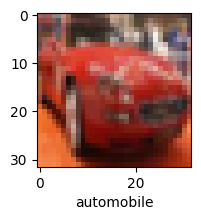

In [14]:
plot_sample(X_train, y_train, 5)

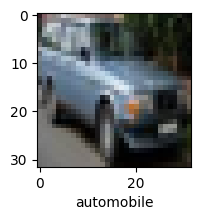

In [17]:
plot_sample(X_train, y_train, 201)

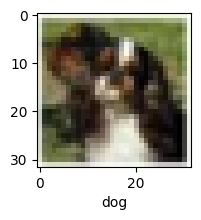

In [18]:
plot_sample(X_train, y_train, 500)

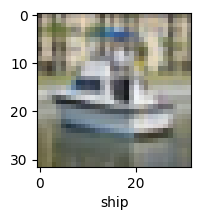

In [19]:
plot_sample(X_train, y_train, 501)

In [20]:
X_train= X_train/255.0
X_test= X_test/255.0

In [40]:
   ann= models.Sequential([
    layers.Flatten(input_shape= (32,32,3)),
    layers.Dense(3000, activation= 'relu'),
    layers.Dense(1000, activation= 'relu'),
    layers.Dense(10, activation= 'softmax')
   ])
ann.compile(optimizer= 'SGD' ,
              loss= 'sparse_categorical_crossentropy',
              metrics= ['accuracy'])

ann.fit(X_train, y_train, epochs=5)  

Epoch 1/5
1563/1563 [==============================] - 177s 112ms/step - loss: 1.8127 - accuracy: 0.3528
Epoch 2/5
1563/1563 [==============================] - 201s 129ms/step - loss: 1.6257 - accuracy: 0.4265
Epoch 3/5
1563/1563 [==============================] - 194s 124ms/step - loss: 1.5430 - accuracy: 0.4568
Epoch 4/5
1563/1563 [==============================] - 203s 130ms/step - loss: 1.4862 - accuracy: 0.4747
Epoch 5/5
1563/1563 [==============================] - 194s 124ms/step - loss: 1.4339 - accuracy: 0.4959


In [41]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_pred= ann.predict(X_test)
y_pred_classes= [np.argmax(element) for element in y_pred]

print('classification report: \n', classification_report(y_test,y_pred_classes))

313/313 [==============================] - 11s 33ms/step
classification report: 
               precision    recall  f1-score   support

           0       0.65      0.40      0.49      1000
           1       0.52      0.62      0.57      1000
           2       0.36      0.40      0.38      1000
           3       0.42      0.15      0.22      1000
           4       0.60      0.12      0.20      1000
           5       0.45      0.26      0.33      1000
           6       0.59      0.45      0.51      1000
           7       0.33      0.70      0.45      1000
           8       0.68      0.45      0.54      1000
           9       0.32      0.77      0.45      1000

    accuracy                           0.43     10000
   macro avg       0.49      0.43      0.42     10000
weighted avg       0.49      0.43      0.42     10000



In [45]:
import seaborn as sns

<function matplotlib.pyplot.show(close=None, block=None)>

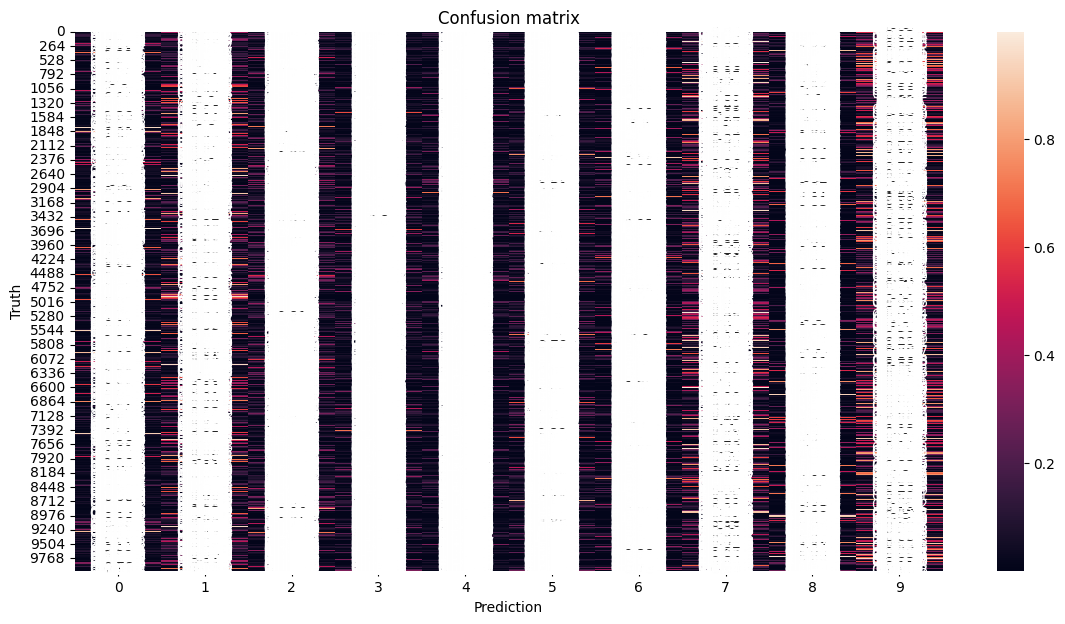

In [48]:
plt.figure(figsize= (14,7))
sns.heatmap(y_pred, annot= True)
plt.ylabel('Truth')
plt.xlabel('Prediction')
plt.title('Confusion matrix')
plt.show

In [55]:
cnn= models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='softmax')
])

In [59]:
cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [60]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 63s 39ms/step - loss: 1.5679 - accuracy: 0.4408
Epoch 2/10
1563/1563 [==============================] - 68s 43ms/step - loss: 1.1874 - accuracy: 0.5832
Epoch 3/10
1563/1563 [==============================] - 59s 38ms/step - loss: 1.0459 - accuracy: 0.6372
Epoch 4/10
1563/1563 [==============================] - 60s 38ms/step - loss: 0.9590 - accuracy: 0.6684
Epoch 5/10
1563/1563 [==============================] - 66s 42ms/step - loss: 0.8938 - accuracy: 0.6889
Epoch 6/10
1563/1563 [==============================] - 59s 38ms/step - loss: 0.8441 - accuracy: 0.7079
Epoch 7/10
1563/1563 [==============================] - 52s 33ms/step - loss: 0.8005 - accuracy: 0.7220
Epoch 8/10
1563/1563 [==============================] - 50s 32ms/step - loss: 0.7623 - accuracy: 0.7342
Epoch 9/10
1563/1563 [==============================] - 48s 31ms/step - loss: 0.7263 - accuracy: 0.7504
Epoch 10/10
1563/1563 [==============================] - 47s 30m

In [61]:
cnn.evaluate(X_test, y_test)

313/313 [==============================] - 5s 11ms/step - loss: 0.9535 - accuracy: 0.6853


[0.9534533023834229, 0.6852999925613403]

In [62]:
y_pred= cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 7s 14ms/step


array([[1.25185982e-03, 2.20720176e-04, 6.42681634e-03, 6.99588418e-01,
        3.53132898e-04, 2.38190323e-01, 1.32770641e-02, 1.43078796e-03,
        3.51370722e-02, 4.12382558e-03, 4.10537760e-13, 2.13075807e-11,
        1.73270664e-12, 3.27317722e-11, 9.91085512e-12, 1.61216082e-12,
        5.10551948e-11, 6.54578336e-11, 7.07006632e-12, 1.84775056e-10,
        1.28143277e-11, 3.88963005e-13, 2.39560628e-12, 3.41590775e-12,
        6.55620957e-13, 6.49916156e-13, 3.27838798e-11, 2.87870144e-11,
        2.34419515e-12, 3.29447268e-11, 1.37165730e-11, 2.27052535e-12,
        5.48547752e-13, 9.38110093e-12, 4.12987734e-11, 3.54855069e-11,
        5.14199135e-11, 1.21490873e-10, 1.61057959e-10, 2.90644527e-12,
        1.41681345e-11, 1.93624040e-11, 1.33453101e-12, 1.19883626e-11,
        4.70906820e-12, 6.07345717e-13, 1.42221142e-12, 1.08118002e-11,
        8.59450618e-12, 2.93641657e-13, 1.50920873e-11, 1.47908092e-11,
        4.43552963e-12, 9.13929414e-13, 1.30116126e-10, 2.792116

In [63]:
y_classes= [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 4]

In [64]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

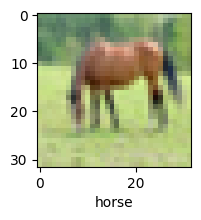

In [66]:
plot_sample(X_test, y_test, 60)

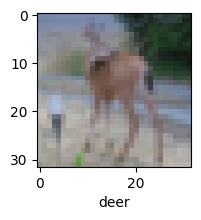

In [67]:
plot_sample(X_test, y_test, 100)

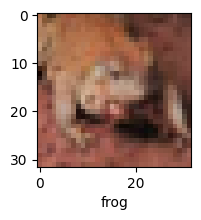

In [68]:
plot_sample(X_test, y_test, 5)